**Here we will train models**

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tvDatafeed import TvDatafeed, Interval
import mplfinance as mpf
import pandas as pd
import ta  # module for technical indicators
import ta.momentum
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = "../../data/reg_dataset.csv"
df = pd.read_csv(path)

In [4]:
data = df

features = data.drop(columns=['Target'])
target = data['Target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

split_index = int(len(features_scaled) * 0.75)
X_train, X_test = features_scaled[:split_index], features_scaled[split_index:]
y_train, y_test = target[:split_index], target[split_index:]

In [5]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor MSE: {rf_mse}")

Random Forest Regressor MSE: 1.2190670169115212


In [6]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Regressor MSE: {xgb_mse}")

XGBoost Regressor MSE: 1.0859992132079281


In [7]:
print(f"Random Forest Predictions: {rf_predictions[:5]}")
print(f"XGBoost Predictions: {xgb_predictions[:5]}")

Random Forest Predictions: [-0.41397603 -0.48513805  0.59999992  0.01171514 -0.05396251]
XGBoost Predictions: [-0.04250625 -0.21509016  0.44131637 -0.26469246 -0.46848   ]


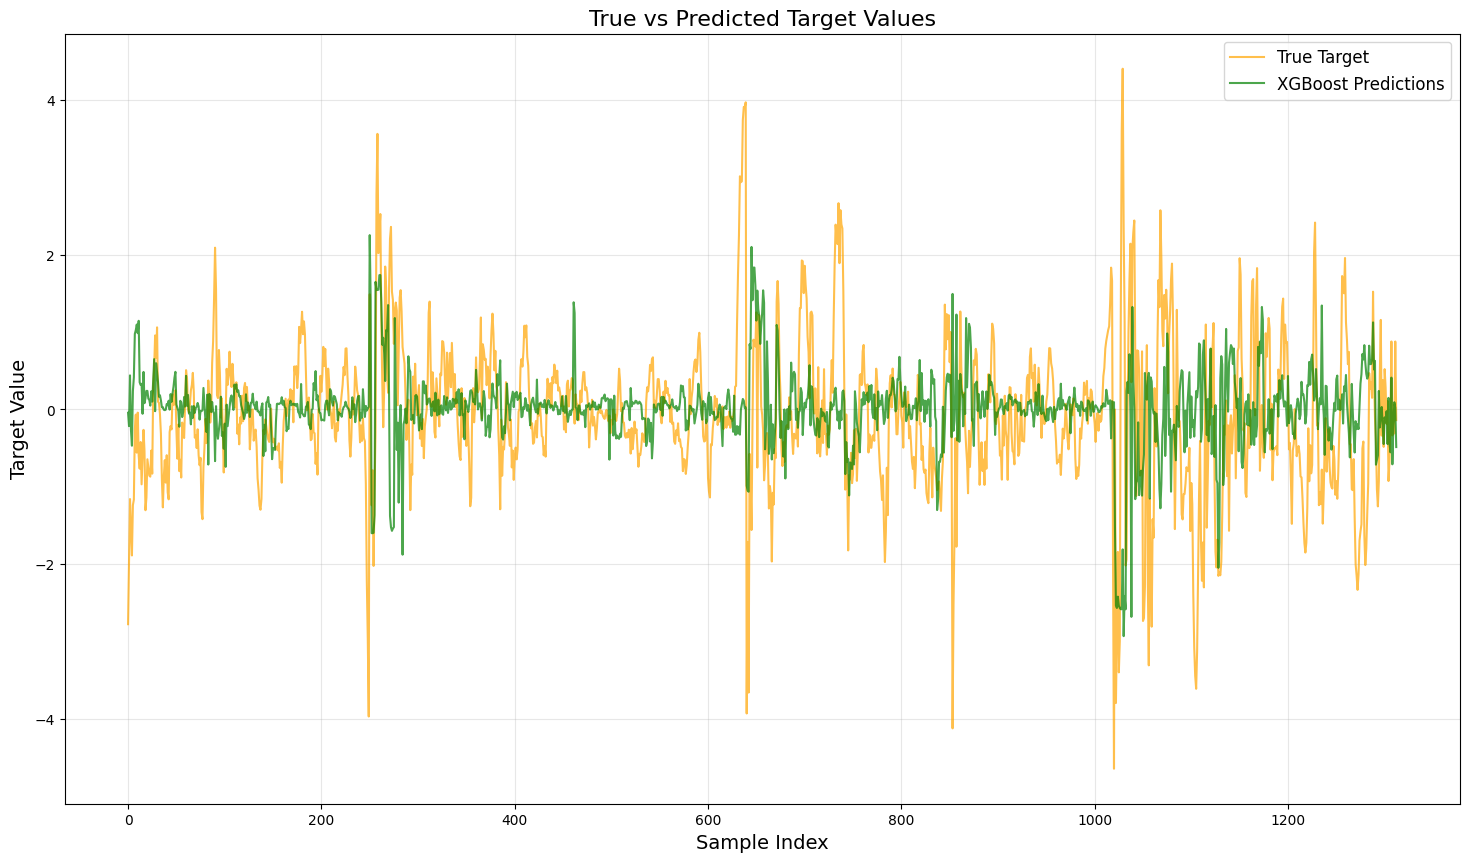

In [8]:
import matplotlib.pyplot as plt

# Ensure the inputs are properly aligned and in the same format
if hasattr(y_test, "values"):  # Handle pandas series
    y_test = y_test.values

if hasattr(xgb_predictions, "values"):  # Handle pandas series
    xgb_predictions = xgb_predictions.values

# Visualize Predictions
plt.figure(figsize=(18, 10))

# Plot true target values
plt.plot(range(len(y_test)), y_test, label="True Target", alpha=0.7, color='orange')

# Plot XGBoost predictions
plt.plot(range(len(xgb_predictions)), xgb_predictions, label="XGBoost Predictions",alpha=0.7, color='green')

# Title and labels
plt.title("True vs Predicted Target Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Target Value", fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


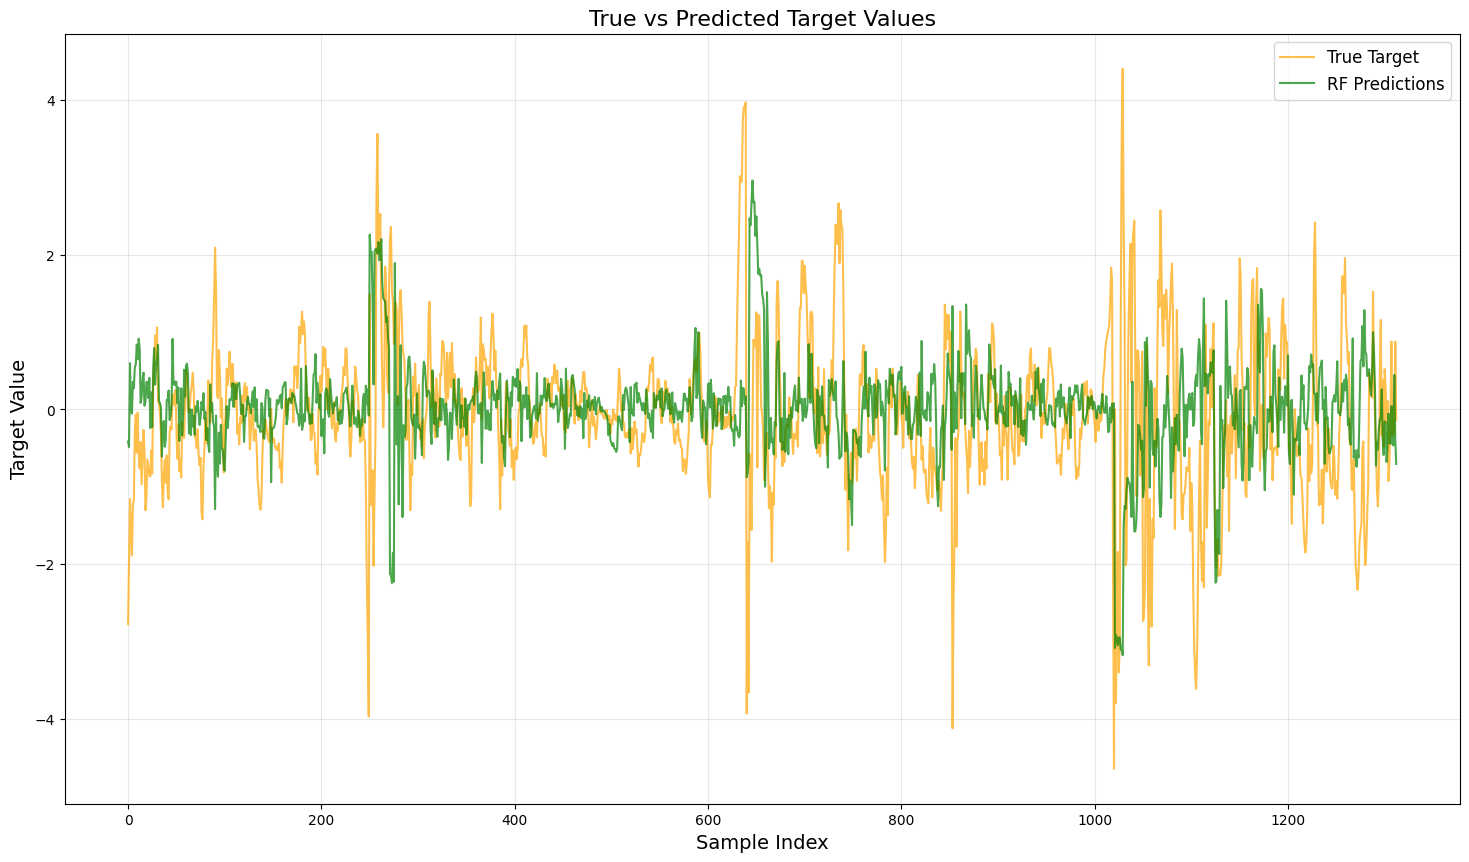

In [9]:
import matplotlib.pyplot as plt

# Ensure the inputs are properly aligned and in the same format
if hasattr(y_test, "values"):  # Handle pandas series
    y_test = y_test.values

if hasattr(rf_predictions, "values"):  # Handle pandas series
    rf_predictions = rf_predictions.values

# Visualize Predictions
plt.figure(figsize=(18, 10))

# Plot true target values
plt.plot(range(len(y_test)), y_test, label="True Target", alpha=0.7, color='orange')

# Plot XGBoost predictions
plt.plot(range(len(rf_predictions)), rf_predictions, label="RF Predictions", alpha=0.7, color='green')

# Title and labels
plt.title("True vs Predicted Target Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Target Value", fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [10]:
from sklearn.metrics import r2_score
rf_r2 = r2_score(y_test, rf_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"Random Forest R2 Score: {rf_r2}")
print(f"XGBoost R2 Score: {xgb_r2}")


Random Forest R2 Score: -0.3358394077828244
XGBoost R2 Score: -0.19002526169534106


**KNN**

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_regressor.fit(X_train, y_train)

# Predictions
y_pred = knn_regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 1.2354
R² Score: -0.3537


**NN**

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(16, activation='relu'),  # Third hidden layer
    Dense(1)  # Output layer (single neuron for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Epoch 1/200


/home/pedro/python_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1493 - val_loss: 0.6848
Epoch 2/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0963 - val_loss: 0.6879
Epoch 3/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1329 - val_loss: 0.6951
Epoch 4/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0934 - val_loss: 0.7159
Epoch 5/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0208 - val_loss: 0.7155
Epoch 6/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0280 - val_loss: 0.7170
Epoch 7/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0495 - val_loss: 0.7154
Epoch 8/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0751 - val_loss: 0.7087
Epoch 9/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0152 - val_loss: 0.7216
Epoch 10/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0209 - val_loss: 0.7164
Epoch 11/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0532 - val_loss: 0.7172
Epoch 12/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

**LSTM:**

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming df is already loaded and processed as in the previous steps

# Features and Target
features = df.drop(columns=['Target'])
target = df['Target']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Prepare the data for LSTM: reshape it into 3D array (samples, time_steps, features)
n_time_steps = 10  # The number of time steps (previous periods you want to use for prediction)
n_features = features_scaled.shape[1]

X = []
y = []

# Create time windows (samples) for the LSTM model
for i in range(n_time_steps, len(features_scaled)):
    X.append(features_scaled[i - n_time_steps:i])  # Collect previous n_time_steps rows
    y.append(target.iloc[i])  # The target value (next period's return)

X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
split_index = int(len(X) * 0.75)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


2025-01-27 22:11:06.432791: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 22:11:06.433310: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 22:11:06.435630: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 22:11:06.441305: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738012266.451049   54636 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738012266.45

In [15]:
# Building the LSTM model for regression
model = Sequential()

# Add the LSTM layers
model.add(LSTM(units=10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to avoid overfitting

model.add(LSTM(units=10, return_sequences=True))  # Second LSTM layer
model.add(Dropout(0.2))

model.add(LSTM(units=10, return_sequences=False))  # ThirdLSTM layer
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))  # No activation for regression (linear output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


W0000 00:00:1738012267.657352   54636 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/pedro/python_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 10)         │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 10)         │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,291 (8.95 KB)

 Trainable params: 2,291 (8.95 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.0404 - val_loss: 0.9287
Epoch 2/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0413 - val_loss: 0.9486
Epoch 3/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0259 - val_loss: 1.0050
Epoch 4/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9864 - val_loss: 1.0269
Epoch 5/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0088 - val_loss: 1.0372
Epoch 6/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9955 - val_loss: 1.0317
Epoch 7/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9458 - val_loss: 1.0933
Epoch 8/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0206 - val_loss: 1.0103
Epoch 9/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9750 - val_loss: 1.0761
Epoch 10/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9728 - val_loss: 1.0835
Epoch 11/200
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8825 - val_loss: 1.0644
Epoch 12/200
246/246 ━━━━━━━━━━━━━━━━━━━━

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0219
Test Loss (MSE): 1.3652372360229492
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Root Mean Squared Error (RMSE): 1.1684336176009424
R^2: -0.5077169421086163


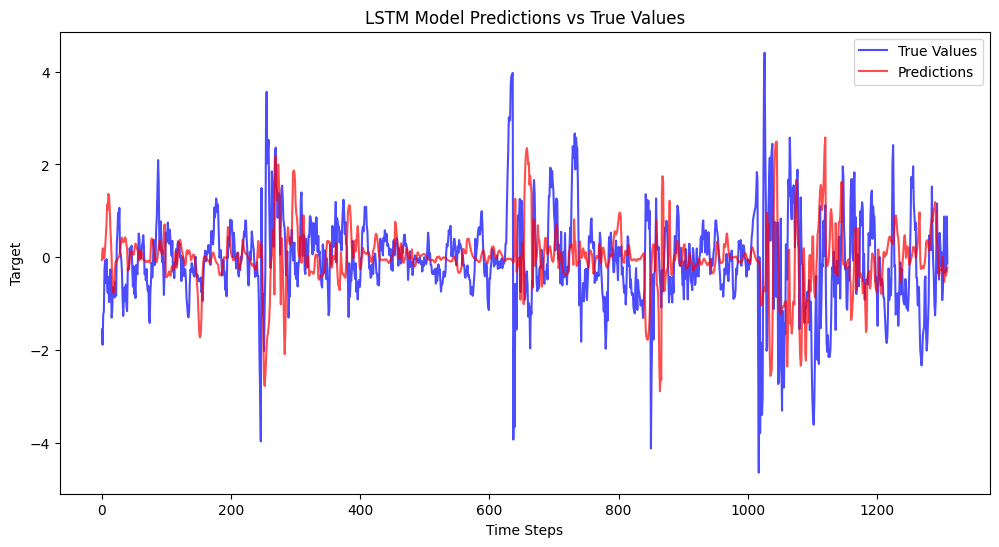

In [17]:
import matplotlib.pyplot as plt

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}')

# Predictions
y_pred_lstm = model.predict(X_test)

# Obliczanie metryk
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2 = r2_score(y_test, y_pred_lstm)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2: {r2}')

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Prawdziwe wartości
plt.plot(y_test, label='True Values', color='blue', alpha=0.7)

# Przewidywania
plt.plot(y_pred_lstm, label='Predictions', color='red', alpha=0.7)

plt.title('LSTM Model Predictions vs True Values')
plt.xlabel('Time Steps')
plt.ylabel('Target')
plt.legend()
plt.show()


**SAVE MODELS**

In [18]:
import os
import joblib

# Ścieżka do katalogu 'models' poza obecnym katalogiem
models_dir = os.path.join('..', 'models')

# Tworzenie katalogu, jeśli nie istnieje
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

joblib.dump(rf_model, os.path.join(models_dir, 'rf_model.pkl'))
joblib.dump(xgb_model, os.path.join(models_dir, 'xgb_model.pkl'))
joblib.dump(model, os.path.join(models_dir, 'lstm_model.pkl'))


['../models/lstm_model.pkl']

**GET AVERAGE FROM MODELS**

In [19]:
print(y_pred_lstm)

[[-0.06264779]
 [ 0.18892267]
 [ 0.18812183]
 ...
 [-0.39498064]
 [-0.307549  ]
 [-0.21838161]]


In [20]:
y_pred_lstm_flat = [item[0] for item in y_pred_lstm]
# Find the minimum length of the arrays
min_length = min(len(rf_predictions), len(xgb_predictions), len(y_pred_lstm_flat))

# Truncate all arrays to the same length
rf_predictions = rf_predictions[:min_length]
xgb_predictions = xgb_predictions[:min_length]
y_pred_lstm_flat = y_pred_lstm_flat[:min_length]
y_test = y_test[:min_length]  # If plotting or evaluation involves y_test

print(y_pred_lstm_flat)
# Compute the averaged predictions
predictions = (rf_predictions + xgb_predictions + y_pred_lstm_flat) / 3

# Verify the result
print(predictions)


[np.float32(-0.06264779), np.float32(0.18892267), np.float32(0.18812183), np.float32(-0.028808106), np.float32(0.013409026), np.float32(0.21030852), np.float32(0.4557194), np.float32(0.68816626), np.float32(1.1391178), np.float32(1.0209185), np.float32(1.3628546), np.float32(1.3251337), np.float32(1.0802368), np.float32(0.6550463), np.float32(0.35159823), np.float32(-0.026386913), np.float32(-0.47952148), np.float32(-0.7088522), np.float32(-0.7766553), np.float32(-0.6115275), np.float32(-0.29178363), np.float32(-0.11097774), np.float32(-0.07892189), np.float32(-0.09646231), np.float32(-0.057520624), np.float32(-0.011687327), np.float32(0.0007210523), np.float32(0.02708786), np.float32(0.1118877), np.float32(0.2364265), np.float32(0.3784239), np.float32(0.42239654), np.float32(0.3388028), np.float32(0.3210723), np.float32(0.32904947), np.float32(0.3880751), np.float32(0.4291363), np.float32(0.3855004), np.float32(0.26231155), np.float32(0.18493325), np.float32(-0.28912178), np.float32(-

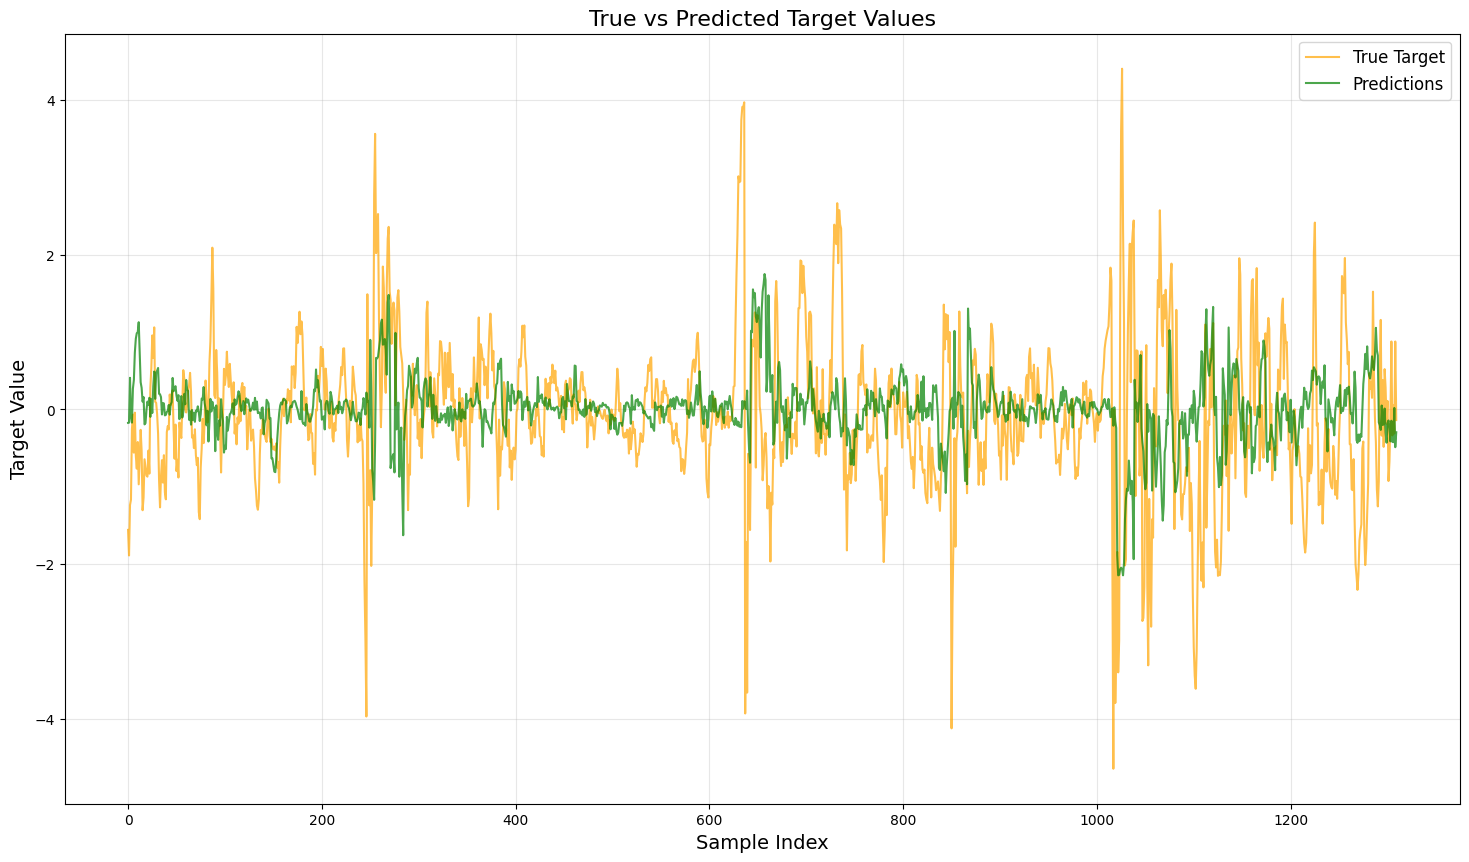

Root Mean Squared Error (RMSE): 1.0477354824652771
R^2: -0.2123137508769386


In [21]:
# Visualize Predictions
plt.figure(figsize=(18, 10))

# Plot true target values
plt.plot(range(len(y_test)), y_test, label="True Target", alpha=0.7, color='orange')

# Plot XGBoost predictions
plt.plot(range(len(predictions)), predictions, label="Predictions", alpha=0.7, color='green')

# Title and labels
plt.title("True vs Predicted Target Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Target Value", fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2: {r2}')


**FINAL PREDICTIONS**

In [291]:
predictions

array([-0.01282197,  0.12168177,  0.18007699, ...,  0.16178386,
        0.09678062,  0.09973714])